# Title: Predictive Analytics for Electronics Store Sales Using Big Data Techniques

**Objectives**:

*   Analyze historical sales data to identify trends and patterns in customer purchasing behavior.
*   Create a predictive model to project sales in the future for various product categories.
*   Determine the main variables affecting sales performance for different product lines.
*   Build a recommendation engine that makes product recommendations based on past purchases made by customers.


**Integration Approach**:
Our Project will follow this Workflow:
*   Data Ingestion: Load the eCommerce dataset into HDFS.
*   Data Preprocessing: Use Spark to clean and transform the data, handling missing values and outliers.
*   Exploratory Data Analysis: Utilize Hive and Spark SQL for initial data exploration and aggregation.
*   Feature Engineering: Create relevant features for our machine learning models using Spark.
*   Model Training: Implement and train our machine learning models using Spark MLlib.
*   Model Evaluation: Assess model performance and fine-tune as necessary.
*   Deployment: Develop a system to make real-time predictions and recommendations.

**Dataset**: https://www.kaggle.com/datasets/mkechinov/ecommerce-purchase-history-from-electronics-store/data


In [25]:
!pip install pyspark findspark

In [26]:
!sudo apt-get update
!sudo apt-get install -y openjdk-11-jdk

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease                         
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2696 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1452 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3353 kB]
Fetched 7886 kB in 2s (4468 kB/s)                     
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openjdk-11-jdk is already the newest version (11.0.24+8-1ubuntu3~22.04).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [27]:
import os

# Set JAVA_HOME for OpenJDK 11 (adjust if necessary)
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-11-openjdk-amd64'
os.environ['PATH'] = os.environ['JAVA_HOME'] + '/bin:' + os.environ['PATH']

# Verify Java is set up correctly
!java -version

openjdk version "11.0.24" 2024-07-16
OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04)
OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)


In [28]:
!pip install pyspark

In [35]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("eCommerceProject").getOrCreate()

In [30]:
pip install s3fs

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import pandas as pd

# # Specify the S3 path to your file
# # s3_file_path = "s3://project5300/outputFile/HIVE_UNION_SUBDIR_2/000005_0-hadoop_20241107220151_b0b4c729-9820-4cc4-9889-5aa56d04a4fc-1"

# s3_file_path = "s3://project5300/mergedFiles/merged_file.csv"

# # Load the text file into a DataFrame, specifying delimiter if necessary
# data = pd.read_csv(s3_file_path, delimiter=",")  # Change delimiter if it's not a comma

# # Display the first few rows of the DataFrame
# data.head()

import pandas as pd

# Define the column names
column_names = ['event_time', 'order_id', 'product_id', 'category_id', 'category', 'brand', 'price', 'user_id', 'product', 'date']

# Specify the S3 path to your file
s3_file_path = "s3://project5300/mergedFiles/merged_file.csv"

# Load the text file into a DataFrame and set the custom column names
data = pd.read_csv(s3_file_path, delimiter=",", names=column_names)

# Display the first few rows of the DataFrame
print(data.head())

             event_time             order_id           product_id  \
0  2020-09-05 13:24:15   2388440981134414751  1515966223510659178   
1  2020-09-05 13:24:15   2388440981134414751  2309018260089078420   
2  2020-09-05 13:24:15   2388440981134414751  2334710302047732319   
3  2020-09-05 13:24:15   2388440981134414751  2363960238735884354   
4  2020-09-05 13:25:27   2388440981134414753  1515966223511370434   

           category_id category   brand         price user_id  product  \
0  2268105649424433598  palisad    6.92  1.515916e+18     NaN  unknown   
1  2268105649281827258  palisad    2.29  1.515916e+18     NaN  unknown   
2  2268105471560778074    bosch  102.75  1.515916e+18     NaN  unknown   
3  2344071110112314066     none   10.16  1.515916e+18     NaN  unknown   
4  2268105471560778074   makita  111.55  1.515916e+18     NaN  unknown   

         date  
0  2020-09-05  
1  2020-09-05  
2  2020-09-05  
3  2020-09-05  
4  2020-09-05  


In [3]:
# Remove rows with null values
data_cleaned = data.dropna()

# Show the total row count after removing null values
print("\nAfter removing null values:")
print("Total rows:", data_cleaned.count())
#data_cleaned.show(10)



After removing null values:
Total rows: event_time     419390
order_id       419390
product_id     419390
category_id    419390
category       419390
brand          419390
price          419390
user_id        419390
product        419390
date           419390
dtype: int64


In [11]:
# data_cleaned.createOrReplaceTempView("ecommerce_data")

In [4]:
# Drop duplicate rows from the DataFrame
data = data.drop_duplicates()

# Display the DataFrame
data.head()


,event_time,order_id,product_id,category_id,category,brand,price,user_id,product,date
0,2020-09-05 13:24:15,2388440981134414751,1515966223510659178,2268105649424433598,palisad,6.92,1.515916e+18,NaN,unknown,2020-09-05
1,2020-09-05 13:24:15,2388440981134414751,2309018260089078420,2268105649281827258,palisad,2.29,1.515916e+18,NaN,unknown,2020-09-05
2,2020-09-05 13:24:15,2388440981134414751,2334710302047732319,2268105471560778074,bosch,102.75,1.515916e+18,NaN,unknown,2020-09-05
3,2020-09-05 13:24:15,2388440981134414751,2363960238735884354,2344071110112314066,none,10.16,1.515916e+18,NaN,unknown,2020-09-05
4,2020-09-05 13:25:27,2388440981134414753,1515966223511370434,2268105471560778074,makita,111.55,1.515916e+18,NaN,unknown,2020-09-05


In [39]:
data = data.drop_duplicates()

In [5]:
# Filter rows where 'event_time' contains '1970'
filtered_df = data[data['event_time'].str.contains('1970')]

filtered_df

,event_time,order_id,product_id,category_id,category,brand,price,user_id,product,date


In [6]:
# Exclude rows where 'event_time' contains '1970'
data = data[~data['event_time'].str.contains('1970')]

data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
event_time,2185340,1299918,2020-04-09 16:30:01,347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,2185340.0,NaN,NaN,NaN,2362363963459909632.0,17419987643783094.0,2294359932054536960.0,2348810593303003136.0,2353259755645961216.0,2383856456827928576.0,2388440981134693888.0
product_id,2185340.0,NaN,NaN,NaN,1704295203484812800.0,329975521541659008.0,1515966223509088512.0,1515966223509105920.0,1515966223509262080.0,1515966223543812096.0,2388434452476881920.0
category_id,2185340.0,NaN,NaN,NaN,2273821966023598336.0,23520137742086120.0,2268105388421284352.0,2268105406750393344.0,2268105428166509056.0,2268105441856717568.0,2374498914001945600.0
category,2073432,908,samsung,356346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,2185340.0,NaN,NaN,NaN,154.192657,242.021267,0.0,14.56,55.53,196.74,50925.9
price,562188.0,NaN,NaN,NaN,1515915625486216448.0,23785313.929379,1515915625439952128.0,1515915625467175424.0,1515915625486698496.0,1515915625511599104.0,1515915625514891264.0
user_id,1578266,13,appliances,605424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,2185340,59,unknown,607074,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,2185340,322,2020-08-17,20582,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Remve empty rows in 'brand', 'user_id' columns
data = data.dropna(subset=['brand', 'user_id']).reset_index(drop=True)
data.isnull().sum()

event_time           0
order_id             0
product_id           0
category_id          0
category         56847
brand                0
price          1144853
user_id              0
product              0
date                 0
dtype: int64

In [10]:
import pandas as pd

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Create 'month' column
data['month'] = data['date'].dt.strftime('%b')  # Abbreviated month name

# Create 'month_num' column to sort month values
data['month_num'] = data['date'].dt.month  # Numeric month

# Create 'week_day' column
data['week_day'] = data['date'].dt.strftime('%a')  # Abbreviated weekday name

# Create 'week_day_num' to sort 'week_day' values (numeric weekday)
data['week_day_num'] = data['date'].dt.strftime('%w').astype('int64')

# Create 'hour' column - 24-hour format from 'event_time'
data['hour'] = data['event_time'].apply(lambda x: x.split(' ')[1].split(':')[0]).astype('int64')

# Delete 'event_time' column
del data['event_time']

# Display the updated DataFrame
data.head()


,order_id,product_id,category_id,category,brand,price,user_id,product,date,month,month_num,week_day,week_day_num,hour
0,2388440981134414754,1515966223510174551,2268105428166508982,samsung,208.31,1.515916e+18,electronics,smartphone,2020-09-05,Sep,9,Sat,6,13
1,2388440981134414754,1515966223527009296,2268105428166508982,xiaomi,277.75,1.515916e+18,electronics,smartphone,2020-09-05,Sep,9,Sat,6,13
2,2388440981134415526,2298437346070102964,2268105412463034456,mattel,3.45,NaN,furniture,bedroom,2020-09-05,Sep,9,Sat,6,13
3,2388440981134414758,1515966223509088613,2268105430162997728,apple,203.68,1.515916e+18,electronics,audio,2020-09-05,Sep,9,Sat,6,13
4,2388440981134414758,1515966223509106817,2268105426648170900,samsung,162.01,1.515916e+18,electronics,tablet,2020-09-05,Sep,9,Sat,6,13


In [11]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
order_id,1578266.0,2362617626778909696.0,2294359932054536960.0,2348814681486918144.0,2353263785122202624.0,2383856681799909376.0,2388440981134693888.0,17470585888104424.0
product_id,1578266.0,1677093638375525888.0,1515966223509088512.0,1515966223509104384.0,1515966223509255424.0,1515966223522710784.0,2388434452476865536.0,312858223265040448.0
category_id,1578266.0,2275876073707035392.0,2268105388421284352.0,2268105404485469184.0,2268105428166509056.0,2268105440220939008.0,2374498914001945600.0,27189733876455900.0
brand,1578266.0,190.70318,0.0,25.9,104.14,254.61,50925.9,260.807623
price,433413.0,1515915625486041856.0,1515915625439952128.0,1515915625466740736.0,1515915625486703360.0,1515915625511263232.0,1515915625514891264.0,23713652.715816
date,1578266,2020-06-08 01:40:11.123600896,2020-01-05 00:00:00,2020-03-12 00:00:00,2020-06-14 00:00:00,2020-08-25 00:00:00,2020-11-21 00:00:00,NaN
month_num,1578266.0,5.749431,1.0,3.0,6.0,8.0,11.0,2.92005
week_day_num,1578266.0,3.028422,0.0,1.0,3.0,5.0,6.0,2.016489
hour,1578266.0,9.166943,0.0,7.0,9.0,11.0,23.0,3.308563


# General Analysis

In [13]:
# Total users
total_users =  data['user_id'].nunique()
print(f'Total users: {total_users: 0,}')

# Total sales
total_sales = round(data['price'].sum())
print(f'Total sales: {total_sales: 0,}')

# Total orders
total_orders = data['order_id'].nunique()
print(f'Total orders: {total_orders: 0,}')

Total users:  13
Total sales:  657,017,538,988,781,877,592,064
Total orders:  1,161,339


In [15]:
df_month = data.groupby(['month_num', 'month']).agg(
                        total_users=('user_id', 'nunique'),
                        total_orders=('order_id', 'nunique'), 
                        total_sales=('price', 'sum')
                        ).sort_values(by='month_num', ascending=True). \
                            reset_index(level='month_num', drop=True)
                            
df_month = df_month.reset_index()
df_month

,month,total_users,total_orders,total_sales
0,Jan,13,100641,1.446184e+22
1,Feb,13,120483,1.823343e+22
2,Mar,13,122790,1.961292e+22
3,Apr,13,34759,1.384183e+22
4,May,13,107210,4.797267e+22
5,Jun,13,172786,4.665534e+22
6,Jul,13,91456,9.497363e+22
7,Aug,13,152018,1.276871e+23
8,Sep,13,163912,8.367854e+22
9,Oct,13,58609,1.166406e+23


In [20]:
!pip install seaborn

In [25]:
!pip install matplotlib

NameError: name 'matplotlib' is not defined

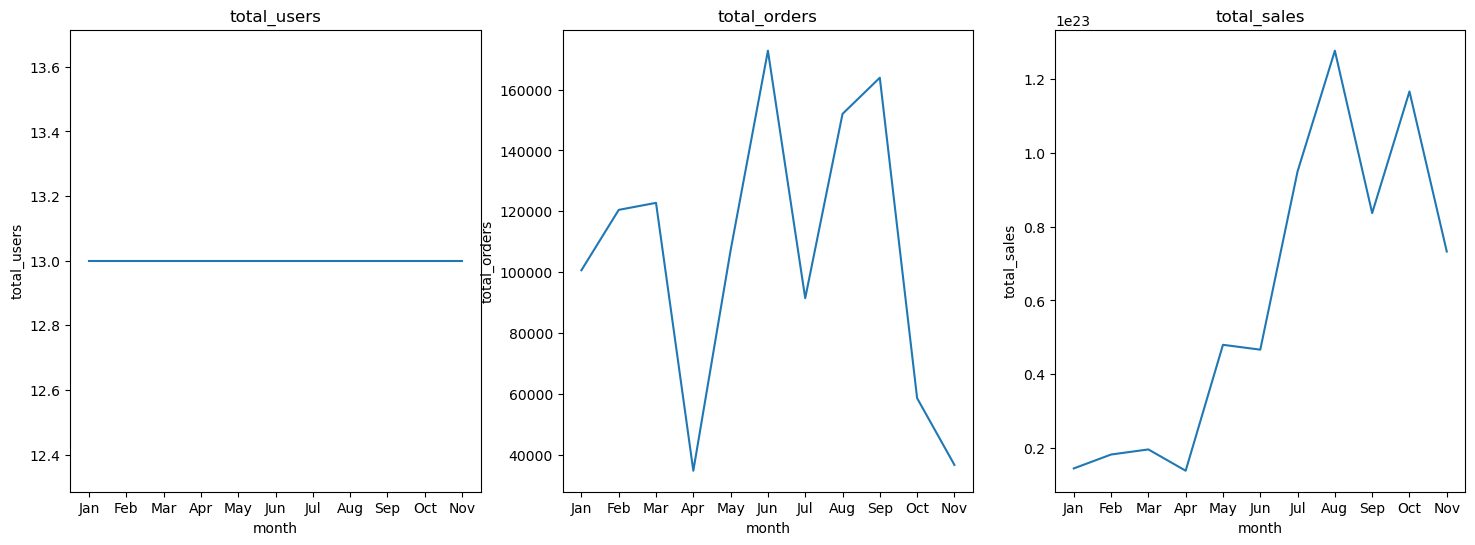

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(18, 6))

for i, col in enumerate(df_month.columns):
    
    if col != 'month':

        fig = plt.subplot(1, 3, i)
        sns.lineplot(data=df_month, x='month', y=col, )
        plt.title(f'{col}')

        if col == 'total_sales':

            fig.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

            # after plotting the data, format the labels
            current_values = plt.gca().get_yticks() 

            plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000000) for x in current_values])
            plt.title(f'{col} (in Millions)')

plt.show()

# Time Analysis
1 Monthly Analysis

In [24]:
from pyspark.sql import functions as F

# Group by 'month_num' and 'month', then aggregate
df_month = data.groupBy("month_num", "month") \
    .agg(
        F.countDistinct("user_id").alias("total_users"),
        F.countDistinct("order_id").alias("total_orders"),
        F.sum("price").alias("total_sales")
    ) \
    .orderBy("month_num", ascending=True)

# Reset index by adding a new column, as PySpark DataFrames don't have an index like pandas
df_month = df_month.withColumn("index", F.monotonically_increasing_id())

# Show the result
df_month.show(truncate=False)

+---------+-----+-----------+------------+--------------------+-----+
|month_num|month|total_users|total_orders|total_sales         |index|
+---------+-----+-----------+------------+--------------------+-----+
|1        |Jan  |8287       |9970        |1905995.3700000108  |0    |
|2        |Feb  |8925       |11026       |2216672.3100000024  |1    |
|3        |Mar  |9161       |11676       |2841015.579999968   |2    |
|4        |Apr  |7687       |8752        |1669080.1900000027  |3    |
|5        |May  |23713      |29644       |7644255.8199999     |4    |
|6        |Jun  |22081      |28073       |7486680.809999961   |5    |
|7        |Jul  |39875      |56363       |1.6019735900000006E7|6    |
|8        |Aug  |46664      |72370       |2.736229879000257E7 |7    |
|9        |Sep  |32863      |49759       |1.6785757139999624E7|8    |
|10       |Oct  |52324      |68405       |1.9361987479999833E7|9    |
|11       |Nov  |37876      |43473       |1.176438111999984E7 |10   |
+---------+-----+---

<ipython-input-25-7bae43623597>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000000) for x in current_values])


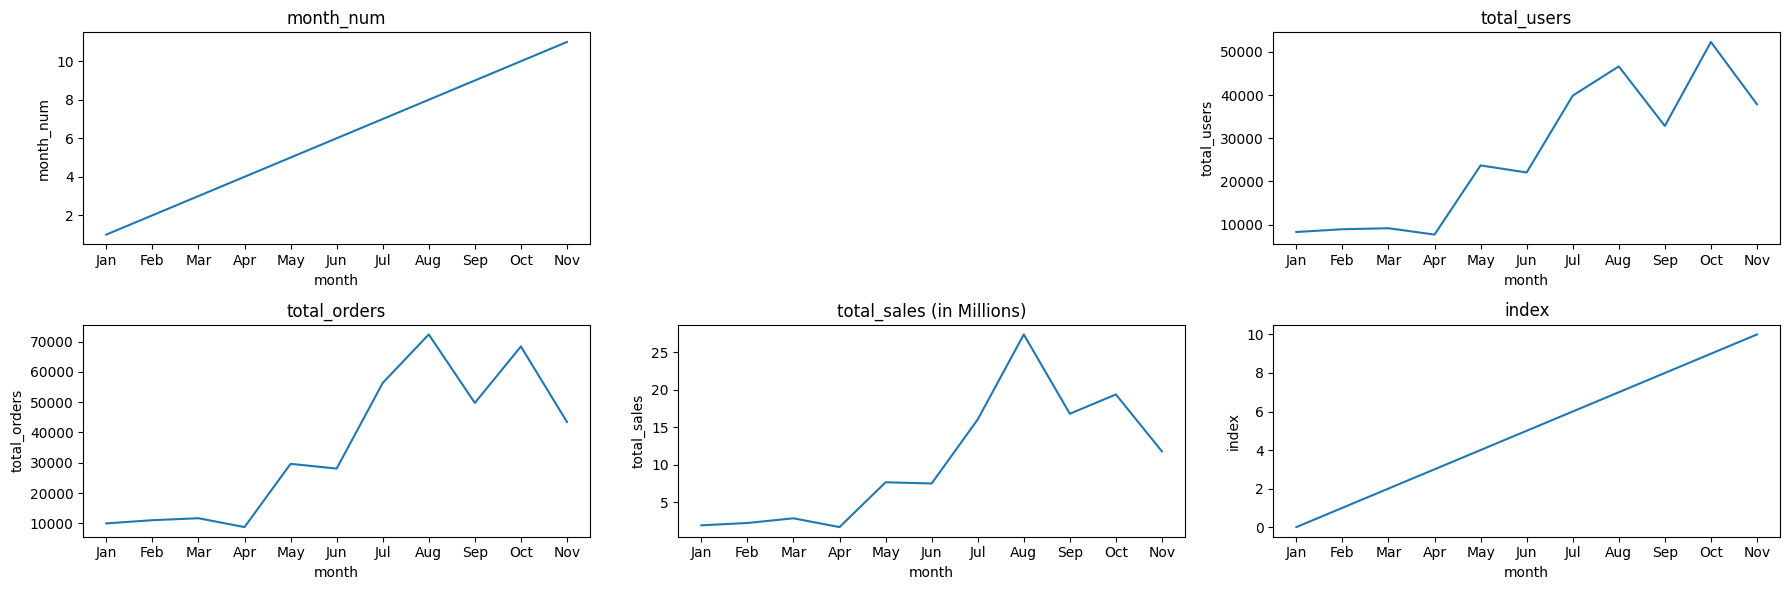

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pandas as pd

# Convert the PySpark DataFrame to Pandas for plotting
df_month_pd = df_month.toPandas()

# Set figure size
plt.figure(figsize=(18, 6))

# Determine number of subplots needed
num_plots = len([col for col in df_month_pd.columns if col != 'month'])

# Create subplots with a dynamic number of rows and columns
rows = (num_plots // 3) + (1 if num_plots % 3 != 0 else 0)  # Add an extra row if necessary
cols = 3  # We will keep 3 columns per row

# Iterate over the columns in the DataFrame for plotting
for i, col in enumerate(df_month_pd.columns):

    if col != 'month':
        # Create subplot for each column (except 'month')
        fig = plt.subplot(rows, cols, i+1)  # Adjust subplot grid dynamically
        sns.lineplot(data=df_month_pd, x='month', y=col)
        plt.title(f'{col}')

        # Format the y-axis if it's 'total_sales'
        if col == 'total_sales':
            fig.get_yaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

            # Format the labels as millions
            current_values = plt.gca().get_yticks()
            plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000000) for x in current_values])
            plt.title(f'{col} (in Millions)')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

2 Weekly Analysis

In [26]:
from pyspark.sql import functions as F

# Group by 'week_day_num' and 'week_day', then aggregate
df_week = data.groupBy("week_day_num", "week_day") \
    .agg(
        F.countDistinct("user_id").alias("total_users"),
        F.countDistinct("order_id").alias("total_orders"),
        F.sum("price").alias("total_sales")
    ) \
    .orderBy("week_day_num", ascending=True)

# Convert the result to a Pandas DataFrame for easier inspection (optional)
df_week_pd = df_week.toPandas()

# Show the result
df_week_pd

,week_day_num,week_day,total_users,total_orders,total_sales
0,0,Sun,45110,56979,1.722210e+07
1,1,Mon,42016,53470,1.622312e+07
2,2,Tue,43886,55495,1.612742e+07
3,3,Wed,44685,55514,1.589760e+07
4,4,Thu,44148,54980,1.563876e+07
5,5,Fri,40653,51655,1.571907e+07
6,6,Sat,49318,61418,1.822979e+07


<ipython-input-27-8c7a230c5ef4>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000000) for x in current_values])


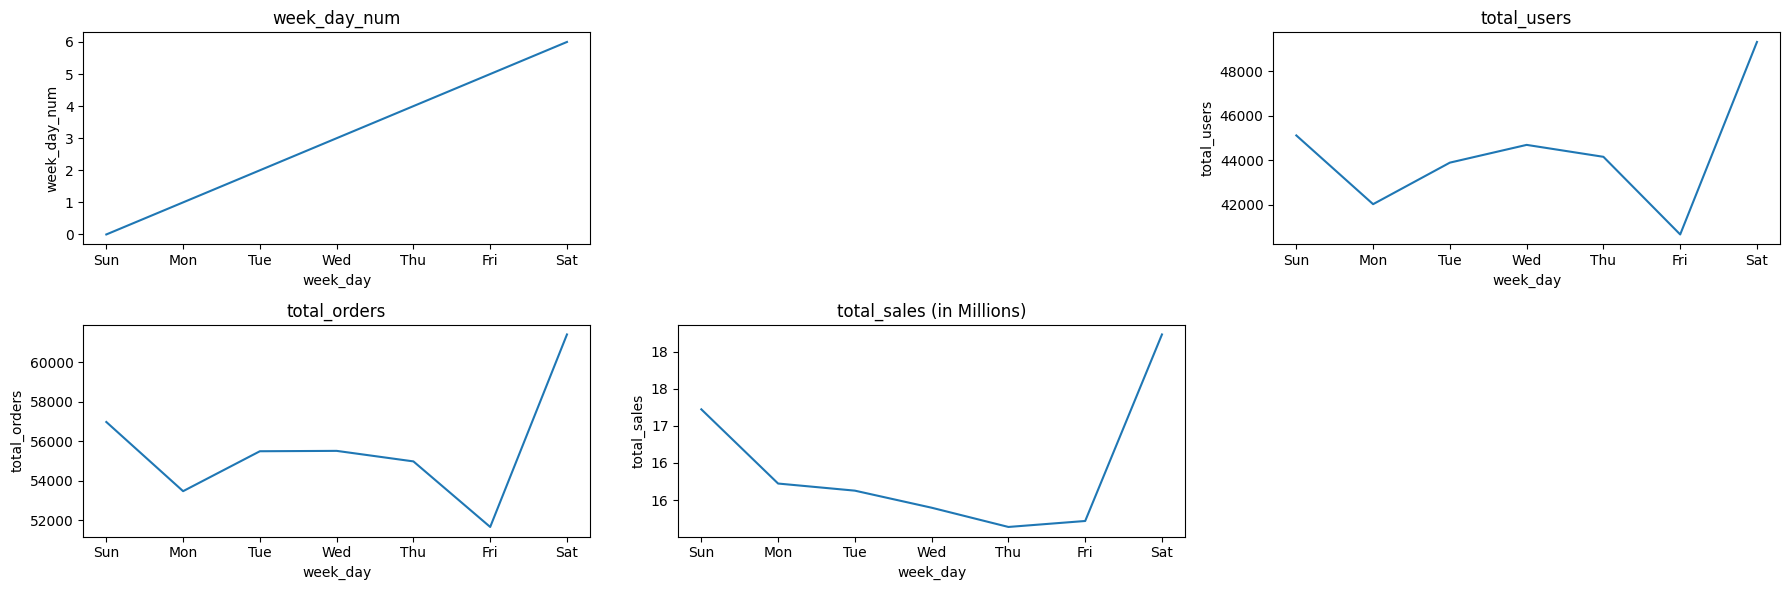

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pandas as pd

# Convert the PySpark DataFrame to Pandas for plotting
df_week_pd = df_week.toPandas()

# Set figure size
plt.figure(figsize=(18, 6))

# Get the number of plots required (exclude 'week_day' column)
num_plots = len([col for col in df_week_pd.columns if col != 'week_day'])

# Calculate the number of rows and columns for the subplots
cols = 3  # Fixed number of columns
rows = (num_plots // cols) + (1 if num_plots % cols != 0 else 0)  # Add an extra row if needed

# Create subplots
for i, col in enumerate(df_week_pd.columns):

    if col != 'week_day':
        # Create subplot for each column (except 'week_day')
        fig = plt.subplot(rows, cols, i+1)  # Adjust the number of rows and columns dynamically
        sns.lineplot(data=df_week_pd, x='week_day', y=col)
        plt.title(f'{col}')

        # Format the y-axis if it's 'total_sales'
        if col == 'total_sales':
            fig.get_yaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

            # Format the labels as millions
            current_values = plt.gca().get_yticks()
            plt.gca().set_yticklabels(['{:,.0f}'.format(x/1000000) for x in current_values])
            plt.title(f'{col} (in Millions)')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

3 Daily Analysis

In [28]:
df_date = data.groupby('date').agg(
                        total_users=('user_id', 'nunique'),
                        total_orders=('order_id', 'nunique'), 
                        total_sales=('price', 'sum')
                        ).reset_index()

df_date

,date,total_users,total_orders,total_sales
0,2020-01-05,13,4595,6.351686e+20
1,2020-01-06,12,4416,5.957548e+20
2,2020-01-07,13,5459,7.518942e+20
3,2020-01-08,13,3686,4.699338e+20
4,2020-01-09,12,3386,5.154113e+20
...,...,...,...,...
317,2020-11-17,11,642,1.156644e+21
318,2020-11-18,12,4388,8.852947e+21
319,2020-11-19,13,4185,8.445166e+21
320,2020-11-20,11,512,9.201608e+20


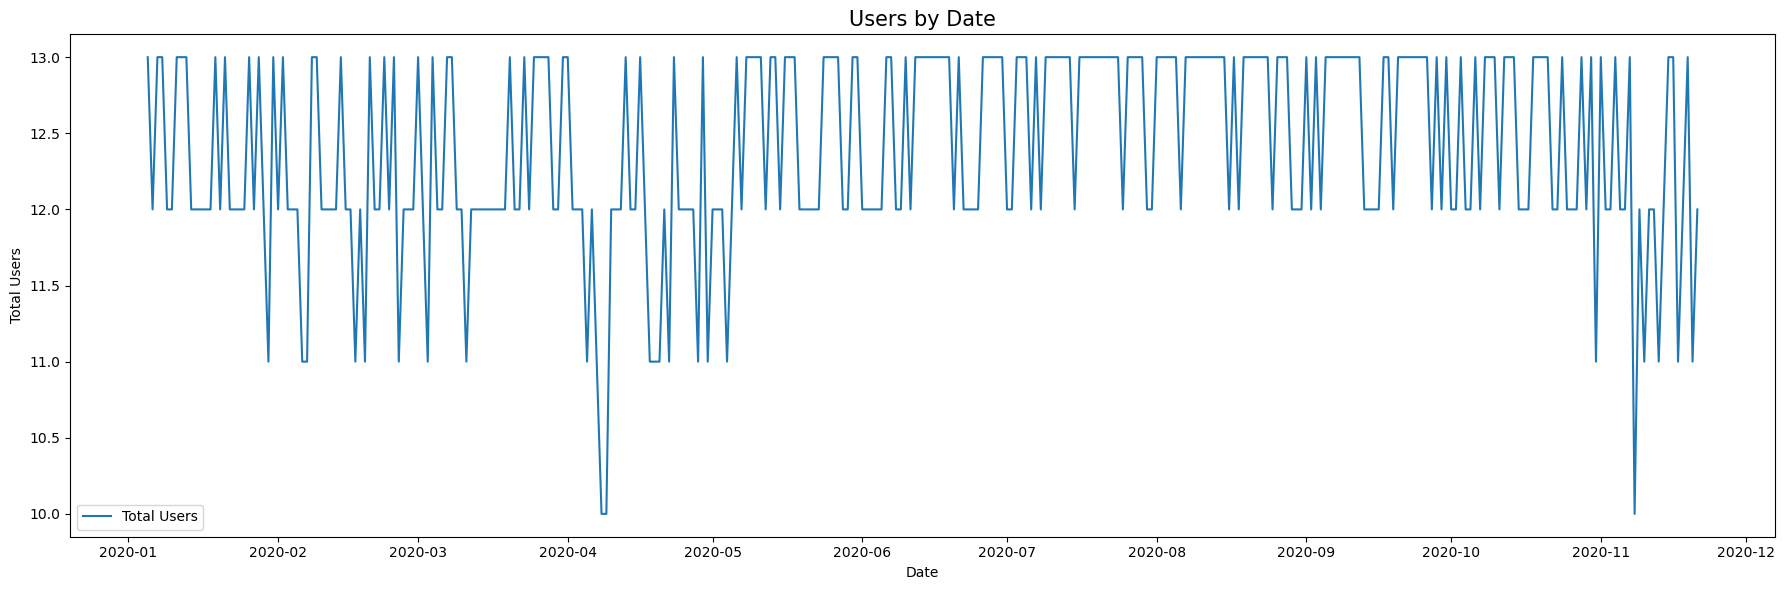

In [29]:
fig, ax = plt.subplots(figsize=(18, 6))
xticks = df_date.date

ax.plot(df_date.date, df_date['total_users'])

ax.set_xlabel('Date')
ax.set_ylabel('Total Users')

ax.legend(['Total Users'])
plt.title('Users by Date', fontsize=15)

plt.tight_layout()
plt.show()

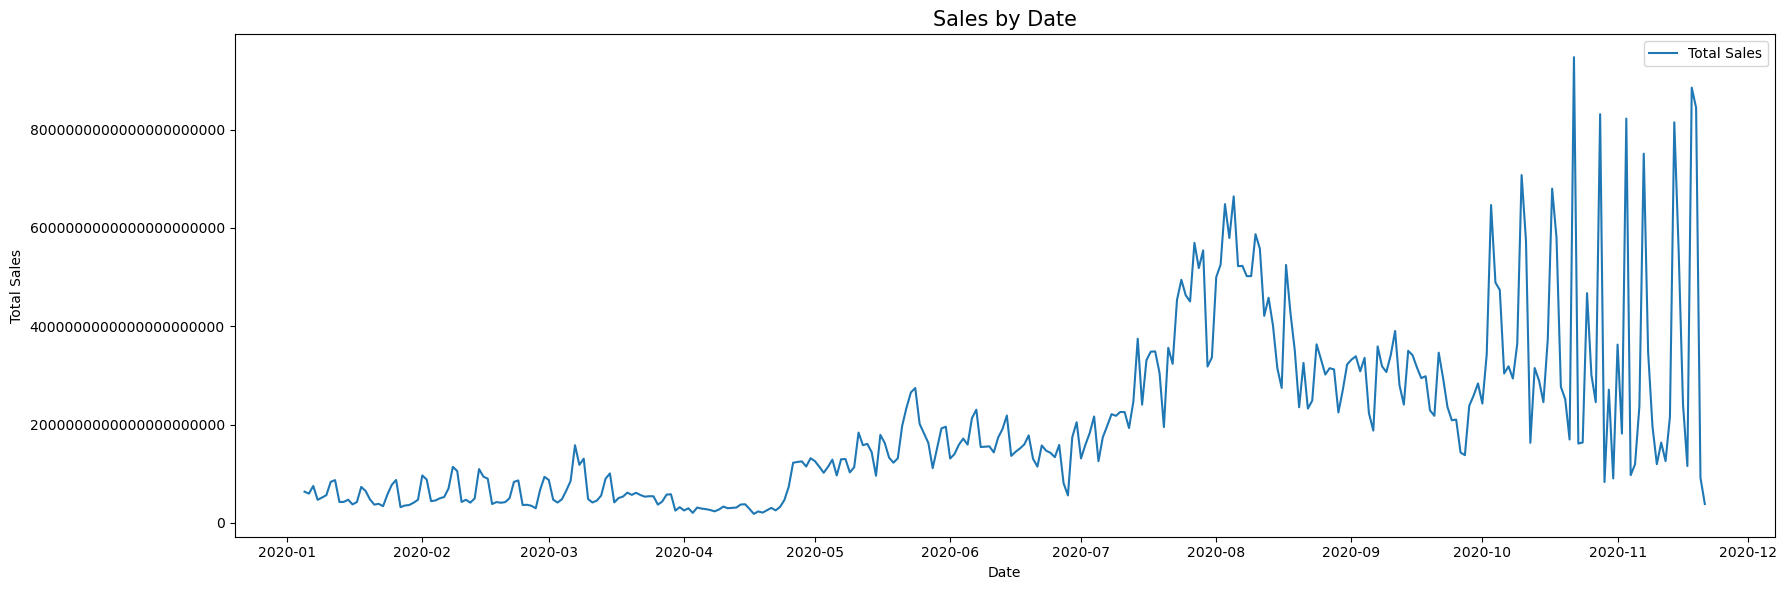

In [30]:
fig, ax = plt.subplots(figsize=(18, 6))
plt.ticklabel_format(style='plain')
xticks = df_date.date

ax.plot(df_date.date, df_date['total_sales'])

ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')

ax.legend(['Total Sales'])
plt.title('Sales by Date', fontsize=15)

plt.tight_layout()
plt.show()

NameError: name 'matplotlib' is not defined

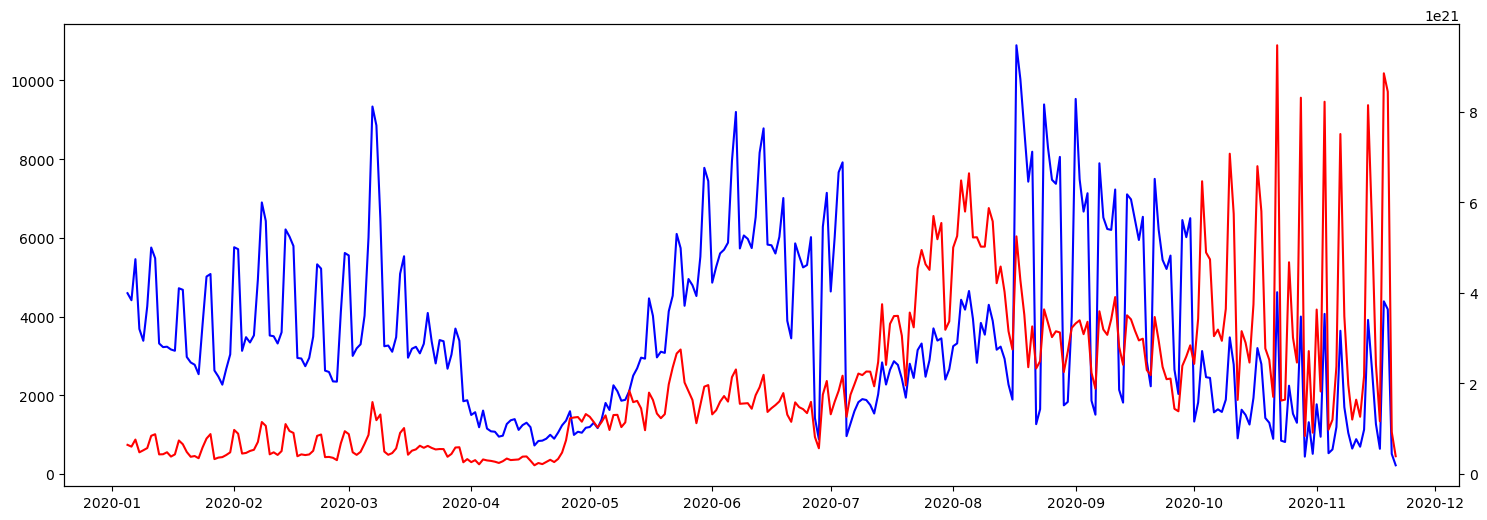

In [31]:
# Add a second y-axis
fig, ax1 = plt.subplots(figsize=(18, 6))
xticks = df_date.date

ax2 = ax1.twinx()
ax1.plot(df_date.date, df_date['total_orders'], color='b')
ax2.plot(df_date.date, df_date['total_sales'], color='r')

# format the second y-axis labels
ax2.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

current_values = plt.gca().get_yticks() 
plt.gca().set_yticklabels(['{:,.1f}'.format(x/1000000) for x in current_values])

ax1.set_xlabel('Date')
ax1.set_ylabel('Total Orders', color='b')
ax2.set_ylabel('Total Sales', color='r')

ax1.legend(['Total Orders'], loc='upper left')
ax2.legend(['Total Sales (in Millions)'], loc='upper right')

plt.title('Total Orders vs Total Sales By Date', fontsize=15)

plt.show()

4 Hourly Analysis

In [33]:
from pyspark.sql import functions as F

# Group by 'hour' and aggregate
df_hour = data.groupBy('hour').agg(
    F.countDistinct('user_id').alias('total_customers'),
    F.countDistinct('order_id').alias('total_orders'),
    F.sum('price').alias('total_sales')
).orderBy('hour', ascending=True)

# Show the result (optional)
df_hour.show()

+----+---------------+------------+--------------------+
|hour|total_customers|total_orders|         total_sales|
+----+---------------+------------+--------------------+
|   0|           3046|        3233|  1062756.5800000017|
|   1|           3155|        3300|   1142636.850000001|
|   2|           4888|        5254|  1813426.6000000022|
|   3|           8691|        9704|   3288581.659999987|
|   4|          17062|       19316|   5296609.319999934|
|   5|          24348|       27805|    7699821.74999997|
|   6|          28285|       32217|    8981992.41999992|
|   7|          29678|       34099|   9413656.029999807|
|   8|          30251|       34702|   9651246.999999791|
|   9|          31165|       35864|1.0237655199999716E7|
|  10|          30978|       35681|   9911764.129999828|
|  11|          28651|       32895|   9314860.939999849|
|  12|          24995|       28676|   8150933.369999931|
|  13|          19949|       22876|   6880213.239999962|
|  14|          13845|       15

<ipython-input-34-3f9b8cdcfd99>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.1f}'.format(x/1000000) for x in current_values])


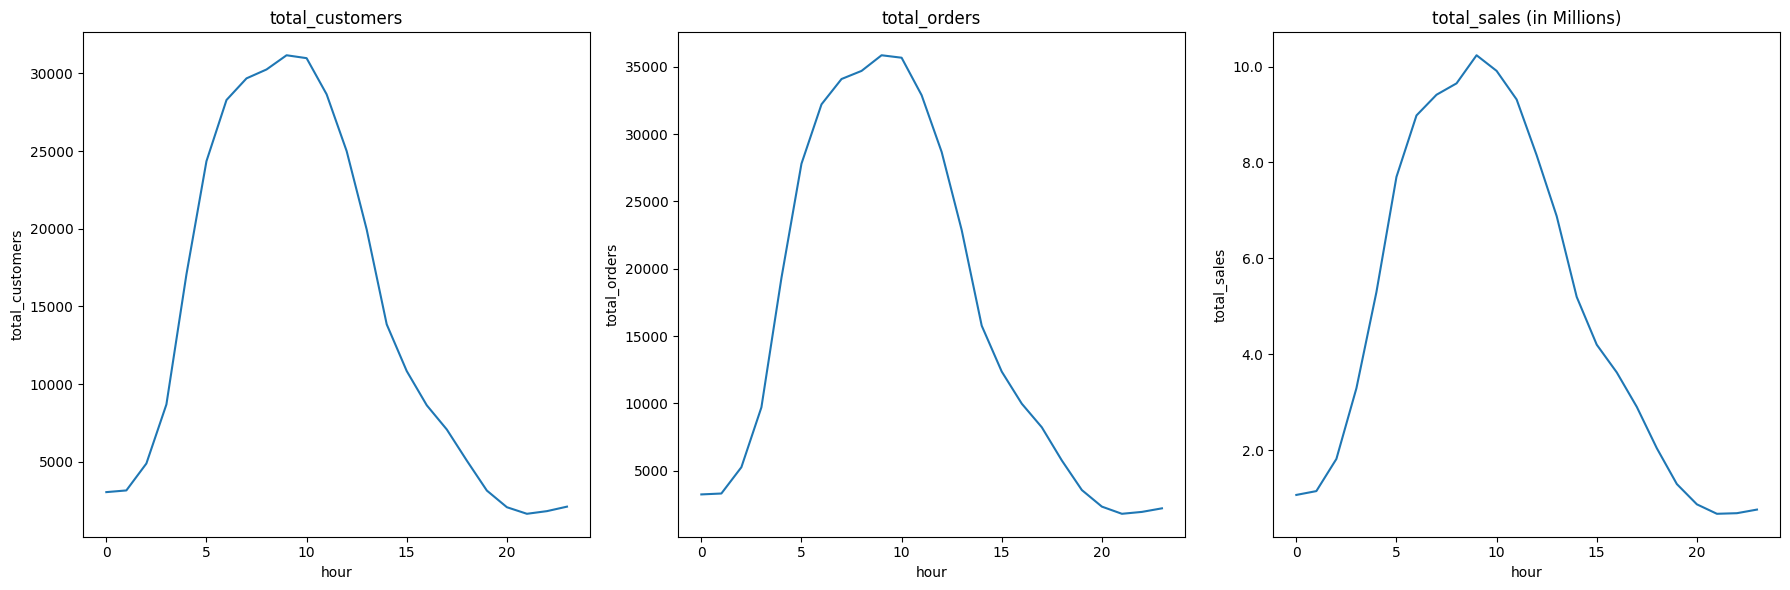

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Convert the PySpark DataFrame to Pandas DataFrame for plotting
df_hour_pd = df_hour.toPandas()

# Set up the figure size
plt.figure(figsize=(18, 6))

# Loop through the columns, excluding 'hour'
for i, col in enumerate(df_hour_pd.columns):
    if col != 'hour':
        # Create subplots
        fig = plt.subplot(1, 3, i)

        # Plot the lineplot using Seaborn
        sns.lineplot(data=df_hour_pd, x='hour', y=col)
        plt.title(f'{col}')

        # Format y-axis for total_sales in millions
        if col == 'total_sales':
            fig.get_yaxis().set_major_formatter(
                ticker.FuncFormatter(lambda x, p: format(int(x), ','))
            )

            # After plotting the data, format the y-axis labels to show values in millions
            current_values = plt.gca().get_yticks()
            plt.gca().set_yticklabels(['{:,.1f}'.format(x/1000000) for x in current_values])
            plt.title(f'{col} (in Millions)')

# Show the plot
plt.tight_layout()
plt.show()

# Customer Analysis

Average Customer Revenue, Average Customer Orders & Average Order Values

In [35]:
from pyspark.sql import functions as F

# Calculate the total sales and the unique number of customers
total_sales = data.agg(F.sum('price')).collect()[0][0]
unique_customers = data.agg(F.countDistinct('user_id')).collect()[0][0]

# Calculate the average customer spending
avg_user_rev = round(total_sales / unique_customers)

# Print the result in the desired format
print(f'Average customer sales: {avg_user_rev: 0,}')

Average customer sales:  502


In [36]:
from pyspark.sql import functions as F

# Calculate the unique number of orders and unique number of customers
total_orders = data.agg(F.countDistinct('order_id')).collect()[0][0]
unique_customers = data.agg(F.countDistinct('user_id')).collect()[0][0]

# Calculate the average customer orders
avg_user_orders = round(total_orders / unique_customers, 0)

# Print the result
print(f'Average customer orders: {avg_user_orders}')

Average customer orders: 2.0


In [37]:
from pyspark.sql import functions as F

# Calculate total sales and unique number of orders
total_sales = data.agg(F.sum('price')).collect()[0][0]
total_orders = data.agg(F.countDistinct('order_id')).collect()[0][0]

# Calculate the average order value
avg_order_value = round(total_sales / total_orders)

# Print the result
print(f'Average order value: {avg_order_value}')

Average order value: 295


Top 10 Customers

In [38]:
from pyspark.sql import functions as F

# Group by 'user_id' and calculate total spending for each customer
top_customers = (
    data.groupBy('user_id')
    .agg(F.sum('price').alias('total_spent'))
    .orderBy(F.desc('total_spent'))
    .limit(10)
)

# Show the result
top_customers.show()

+-------------------+------------------+
|            user_id|       total_spent|
+-------------------+------------------+
|1515915625512854301|           68035.6|
|1515915625466740683| 66697.53000000001|
|1515915625505835892|63986.419999999984|
|1515915625513809944|           60182.2|
|1515915625456901629| 57902.81000000001|
|1515915625460303747|          51191.19|
|1515915625510845934|          45797.89|
|1515915625496634949|          44224.45|
|1515915625492172027|44070.680000000015|
|1515915625512438990|           42163.7|
+-------------------+------------------+



In [39]:
from pyspark.sql import functions as F

# Assuming 'data' is a PySpark DataFrame
customer_orders = data.groupBy('user_id').agg(
    F.count('order_id').alias('total_orders')
).orderBy('total_orders', ascending=False).limit(10)

customer_orders.show()


+-------------------+------------+
|            user_id|total_orders|
+-------------------+------------+
|1515915625456901629|         214|
|1515915625505835892|         202|
|1515915625514704541|         200|
|1515915625466740683|         185|
|1515915625513724906|         169|
|1515915625512016162|         165|
|1515915625442940349|         155|
|1515915625492172027|         148|
|1515915625513720707|         141|
|1515915625512895841|         137|
+-------------------+------------+



In [40]:
from pyspark.sql import functions as F

# Assuming 'data' is a PySpark DataFrame
customer_sales = data.groupBy('user_id').agg(
    F.sum('price').alias('total_sales')
).orderBy('total_sales', ascending=False).limit(10)

customer_sales.show()

+-------------------+------------------+
|            user_id|       total_sales|
+-------------------+------------------+
|1515915625512854301|           68035.6|
|1515915625466740683| 66697.53000000001|
|1515915625505835892|63986.419999999984|
|1515915625513809944|           60182.2|
|1515915625456901629| 57902.81000000001|
|1515915625460303747|          51191.19|
|1515915625510845934|          45797.89|
|1515915625496634949|          44224.45|
|1515915625492172027|44070.680000000015|
|1515915625512438990|           42163.7|
+-------------------+------------------+



# Product Analysis
Top 10 Categories

In [41]:
# Assuming 'data' is a PySpark DataFrame
unique_categories = data.select('category').distinct().count()

print(f'Unique categories: {unique_categories}')

Unique categories: 14


In [42]:
from pyspark.sql import functions as F

# Assuming 'data' is a PySpark DataFrame
orders_category = data.filter(data['category'] != 'unknown') \
    .groupBy('category') \
    .agg(F.count('order_id').alias('total_orders')) \
    .orderBy('total_orders', ascending=False) \
    .limit(10)

orders_category.show()

+------------+------------+
|    category|total_orders|
+------------+------------+
| electronics|      156850|
|  appliances|      145478|
|   computers|       72488|
|   furniture|       21271|
|  stationery|        8715|
|construction|        3965|
| accessories|        3029|
|     apparel|        2674|
|        kids|        2277|
|        auto|        1369|
+------------+------------+



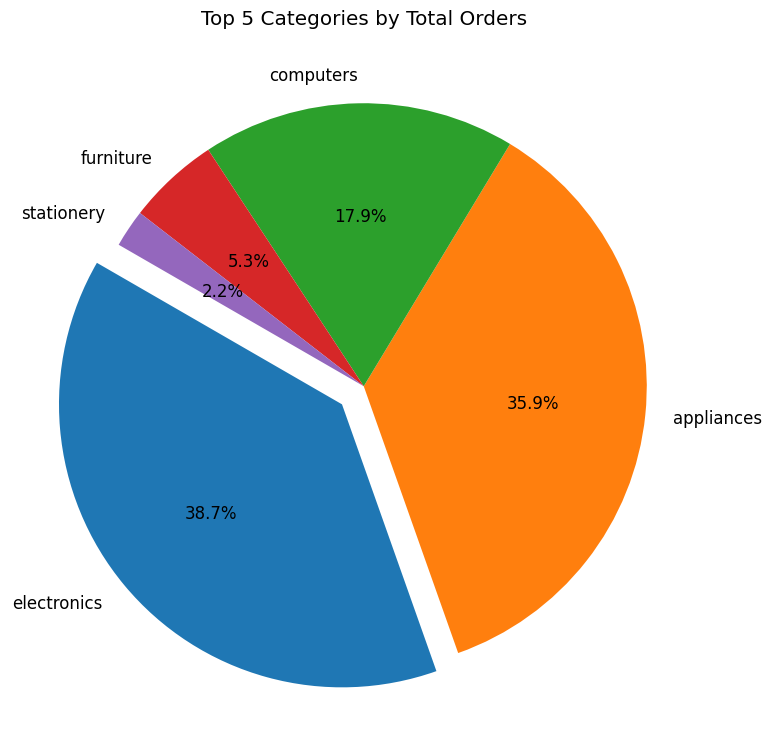

In [43]:
import matplotlib.pyplot as plt

# Assuming 'orders_category' is the result from the previous PySpark code
# Collect the top 5 categories and their total orders
top_5_categories = orders_category.limit(5).toPandas()

# Extract the labels (category names) and data (total orders)
labels = top_5_categories['category']
orders = top_5_categories['total_orders']

# Only "explode" the 1st slice (i.e., first category)
explode = (0.1, 0, 0, 0, 0)

# Set the plot style and size
plt.rcParams.update({'font.size': 12, 'figure.facecolor': 'white'})

# Plot the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(orders, explode=explode, labels=labels, autopct='%1.1f%%', startangle=150)

# Title and layout
plt.title('Top 5 Categories by Total Orders')
plt.tight_layout()
plt.show()

In [44]:
from pyspark.sql import functions as F

# Assuming 'data' is a PySpark DataFrame
sales_category = data.filter(data['category'] != 'unknown') \
    .groupBy('category') \
    .agg(F.sum('price').alias('total_sales')) \
    .orderBy('total_sales', ascending=False) \
    .limit(10)

sales_category.show()

+------------+--------------------+
|    category|         total_sales|
+------------+--------------------+
| electronics| 5.680768226999977E7|
|  appliances| 2.747857780000299E7|
|   computers|1.9258391870000843E7|
|   furniture|   1025304.510000014|
|     apparel|   791136.6200000059|
|        kids|   549751.7400000016|
|construction|   332007.4000000019|
|       sport|  243951.73999999982|
|        auto|  120307.99000000008|
|    medicine|   70672.02999999988|
+------------+--------------------+



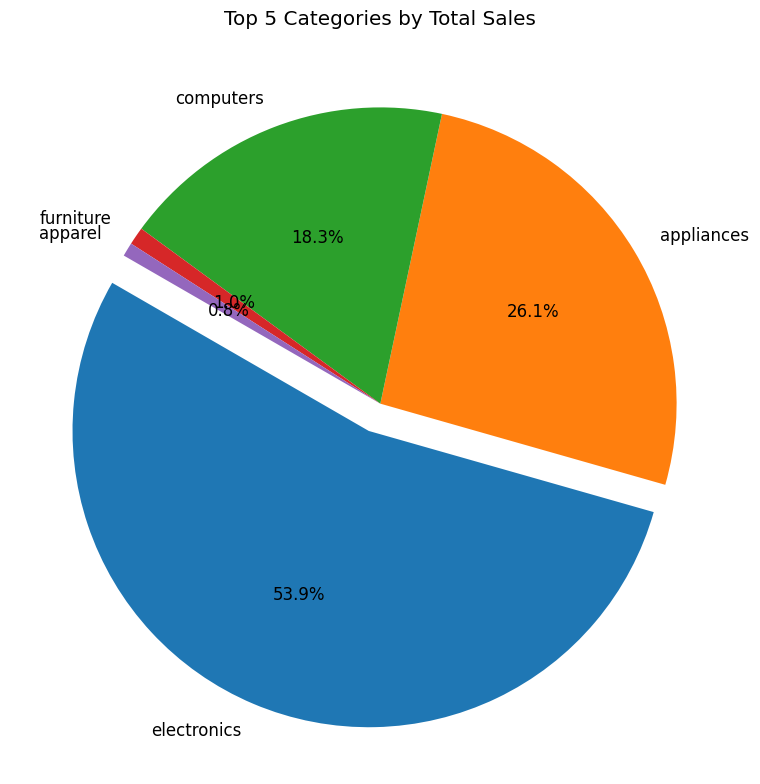

In [45]:
import matplotlib.pyplot as plt

# Convert the top 5 categories by total sales into a Pandas DataFrame
top_5_sales_category = sales_category.limit(5).toPandas()

# Extract the labels (category names) and data (total sales)
labels = top_5_sales_category['category']
sales = top_5_sales_category['total_sales']

# Only "explode" the 1st slice (i.e., first category)
explode = (0.1, 0, 0, 0, 0)

# Set the plot style and size
plt.rcParams.update({'font.size': 12, 'figure.facecolor': 'white'})

# Plot the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sales, explode=explode, labels=labels, autopct='%1.1f%%', startangle=150)

# Title and layout
plt.title('Top 5 Categories by Total Sales')
plt.tight_layout()
plt.show()

Top 10 Brands

In [46]:
# Assuming 'data' is a PySpark DataFrame
unique_brands = data.select('brand').distinct().count()

print(f'Number of brands sold: {unique_brands}')

Number of brands sold: 868


In [47]:
from pyspark.sql import functions as F

# Assuming 'data' is a PySpark DataFrame
df_brand = data.groupBy('brand').agg(
    F.countDistinct('user_id').alias('total_users'),
    F.countDistinct('order_id').alias('total_orders'),
    F.sum('price').alias('total_sales')
).orderBy('total_sales', ascending=False).limit(10)

df_brand.show()

+-------+-----------+------------+--------------------+
|  brand|total_users|total_orders|         total_sales|
+-------+-----------+------------+--------------------+
|samsung|      60188|       84787|2.8919868060002603E7|
|  apple|      23680|       34314| 2.597772093000272E7|
|     lg|      12040|       15596|   7810253.909999922|
|   asus|       6493|        8951|    5077234.25000003|
| lenovo|       5909|        7854|   4583206.989999925|
|  bosch|       6834|        8432|  3344726.7399999723|
|     hp|       4763|        6011|  2499082.0300000263|
| xiaomi|      11526|       14425|  2392401.1000000723|
| huawei|       8133|        9908|   2225618.740000055|
|   beko|       5948|        7309|   2064730.519999997|
+-------+-----------+------------+--------------------+



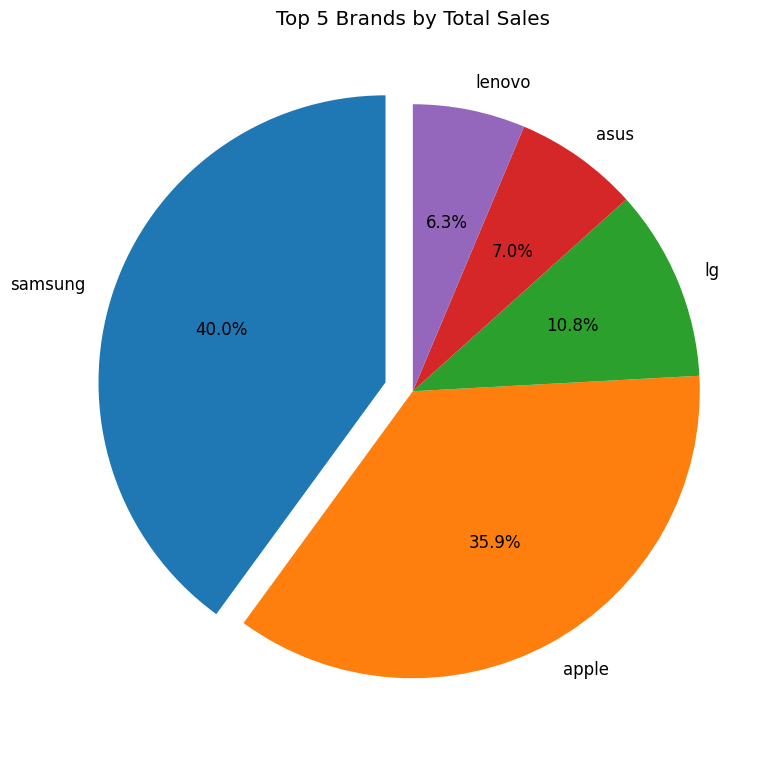

In [48]:
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame to Pandas (top 5 brands by total sales)
top_5_brands = df_brand.limit(5).toPandas()

# Extract the labels (brand names) and data (total sales)
labels = top_5_brands['brand']
sales = top_5_brands['total_sales']

# Only "explode" the 1st slice (i.e., first brand)
explode = (0.1, 0, 0, 0, 0)

# Set the plot style and size
plt.rcParams.update({'font.size': 12, 'figure.facecolor': 'white'})

# Plot the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sales, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

# Title and layout
plt.title('Top 5 Brands by Total Sales')
plt.tight_layout()
plt.show()

Top 10 Products

In [49]:
# Assuming 'data' is a PySpark DataFrame
unique_products = data.select('product').distinct().count()
total_products_sold = data.select('product_id').distinct().count()

print(f'Unique products: {unique_products}')
print(f'Total products sold: {total_products_sold}')

Unique products: 59
Total products sold: 19078


In [50]:
from pyspark.sql import functions as F

# Assuming 'data' is a PySpark DataFrame
df_product = data.groupBy('product', 'brand').agg(
    F.countDistinct('user_id').alias('total_users'),
    F.countDistinct('order_id').alias('total_orders'),
    F.sum('price').alias('total_sales')
).orderBy('total_sales', ascending=False).limit(10)

df_product.show()

+----------+-------+-----------+------------+--------------------+
|   product|  brand|total_users|total_orders|         total_sales|
+----------+-------+-----------+------------+--------------------+
|smartphone|  apple|      16157|       23072|1.9197020270001028E7|
|smartphone|samsung|      33934|       47823|1.6212934800000025E7|
|   kitchen|samsung|       8438|       10565|   5180819.420000051|
|  notebook|   asus|       5420|        7490|  4701716.8300000215|
|  notebook| lenovo|       5558|        7431|   4507802.539999923|
|   kitchen|     lg|       6653|        8562|  3984166.8499999614|
|     video|samsung|       4834|        6094|  3912395.7299999897|
|  notebook|  apple|       1498|        2252|   3298059.459999995|
|     video|     lg|       4302|        5545|   3291221.969999993|
|   kitchen|  bosch|       5307|        6436|  2754443.2399999723|
+----------+-------+-----------+------------+--------------------+



In [51]:
from pyspark.sql import functions as F

# Assuming 'data' is a PySpark DataFrame
df_product_1 = data.filter(data['product'] != 'unknown') \
    .groupBy('product').agg(
        F.countDistinct('user_id').alias('total_users'),
        F.countDistinct('order_id').alias('total_orders'),
        F.sum('price').alias('total_sales')
    ).orderBy('total_sales', ascending=False).limit(10)

df_product_1.show()

+-----------+-----------+------------+--------------------+
|    product|total_users|total_orders|         total_sales|
+-----------+-----------+------------+--------------------+
| smartphone|      66011|       95100| 4.123275365000314E7|
|    kitchen|      60941|       81568|2.1665821860000253E7|
|   notebook|      17750|       24635|1.4784603760000098E7|
|      video|      13526|       17306|   8784955.249999952|
|environment|      26289|       31890|   4913323.780000079|
|     tablet|       4940|        6290|  2343075.1000000183|
|     clocks|       4774|        6217|   2184102.879999988|
|peripherals|      15951|       19513|  1903014.0600000033|
|      audio|      17089|       20324|  1865566.9700000752|
| components|       9595|       12499|  1785725.8099999977|
+-----------+-----------+------------+--------------------+



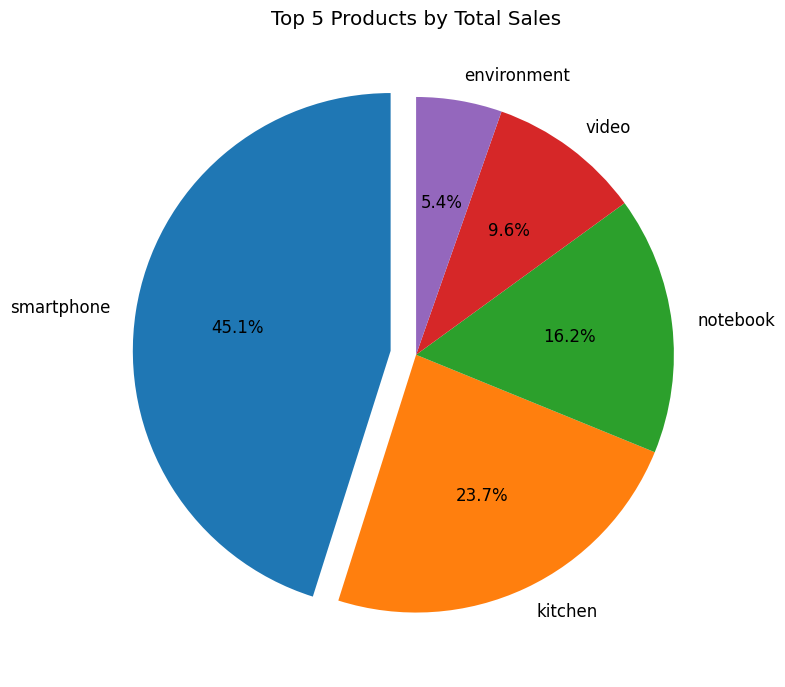

In [52]:
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame to a Pandas DataFrame (top 5 products by total sales)
top_5_products = df_product_1.limit(5).toPandas()

# Extract the labels (product names) and data (total sales)
labels = top_5_products['product']
sales = top_5_products['total_sales']

# Only "explode" the 1st slice (i.e., first product)
explode = (0.1, 0, 0, 0, 0)

# Set the plot style and size
plt.rcParams.update({'font.size': 12, 'figure.facecolor': 'white'})

# Plot the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sales, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

# Title and layout
plt.title('Top 5 Products by Total Sales')
plt.tight_layout()
plt.show()

Top 5 Selling Smart Phone Brands

In [53]:
from pyspark.sql import functions as F

# Assuming 'data' is a PySpark DataFrame
df_smartphone = data.filter(data['product'] == 'smartphone') \
    .groupBy('brand').agg(
        F.countDistinct('user_id').alias('total_users'),
        F.countDistinct('order_id').alias('total_orders'),
        F.sum('price').alias('total_sales')
    ).orderBy('total_sales', ascending=False)

df_smartphone.show()

+---------+-----------+------------+--------------------+
|    brand|total_users|total_orders|         total_sales|
+---------+-----------+------------+--------------------+
|    apple|      16157|       23072|1.9197020270001087E7|
|  samsung|      33934|       47823|1.6212934800000018E7|
|   huawei|       6115|        7422|  1888025.1500000437|
|     oppo|       5515|        6570|  1682156.7500000494|
|   xiaomi|       6082|        8085|  1635345.4900000268|
|    honor|       1427|        1900|   335849.8100000019|
|     vivo|        680|         783|  165235.11000000016|
|     sony|        385|         515|   82928.07999999975|
|    nokia|        119|         129|  12167.570000000007|
|       lg|          1|           1|             9606.48|
|microsoft|         61|          63|   3774.189999999998|
|     eset|        363|         368|  3654.6700000000064|
|     awax|        485|         492|  2735.5199999999836|
|kaspersky|         61|          64|   882.1800000000003|
|      fly|   

Though Samsung **sold twice** as many smartphones as Apple. Apple generated **more** revenues than Samsung.

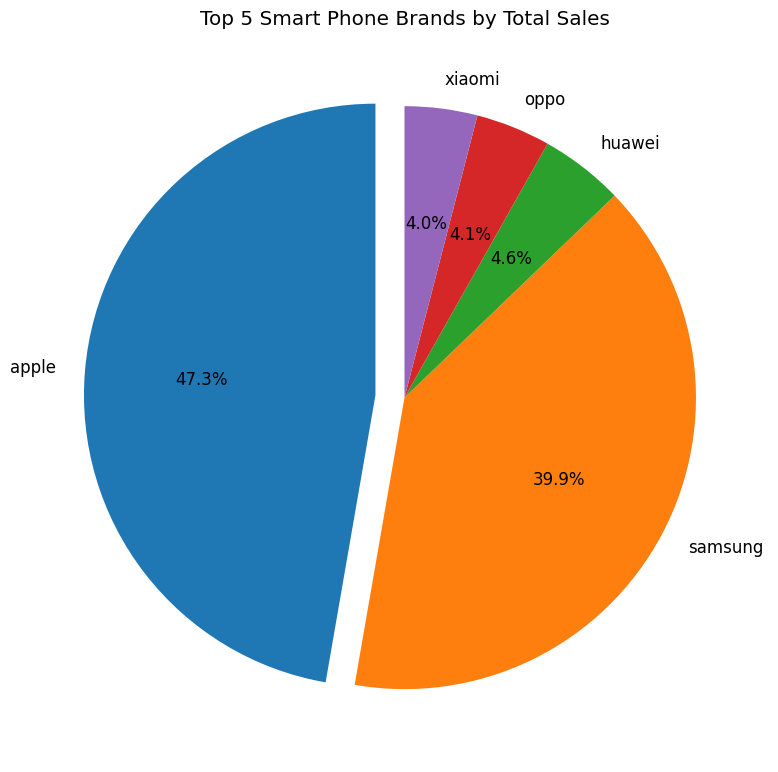

In [54]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder.appName("Smartphone Sales").getOrCreate()

# Assuming df_smartphone is already a PySpark DataFrame with 'brand' and 'total_sales' columns
# If it's a Pandas DataFrame, first convert it to a Spark DataFrame with spark.createDataFrame()

# Select the top 5 smartphone brands by total sales
top_brands = (df_smartphone
              .orderBy(col("total_sales").desc())
              .limit(5)
              .select("brand", "total_sales")
              .collect())

# Extract brand names and sales for plotting
labels = [row['brand'] for row in top_brands]
sales = [row['total_sales'] for row in top_brands]

# Define explode values for the pie chart (only explode the first slice)
explode = (0.1, 0, 0, 0, 0)

# Plot the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(x=sales, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Top 5 Smart Phone Brands by Total Sales')
plt.tight_layout()
plt.show()

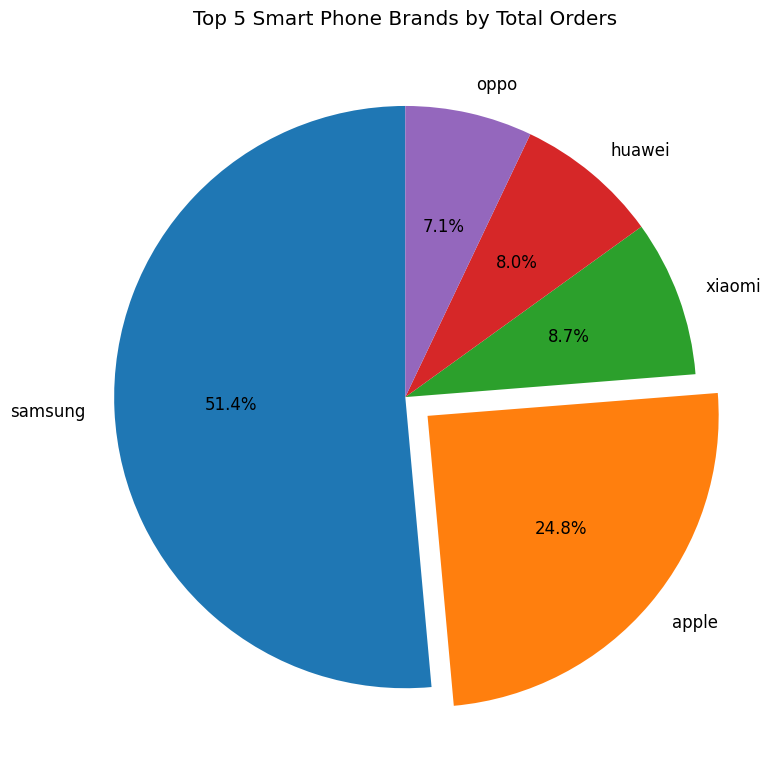

In [55]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder.appName("Smartphone Orders").getOrCreate()

# Assuming df_smartphone is already a PySpark DataFrame with 'brand' and 'total_orders' columns

# Select the top 5 smartphone brands by total orders
top_brands = (df_smartphone
              .orderBy(col("total_orders").desc())
              .limit(5)
              .select("brand", "total_orders")
              .collect())

# Extract brand names and orders for plotting
labels = [row['brand'] for row in top_brands]
orders = [row['total_orders'] for row in top_brands]

# Define explode values for the pie chart (only explode the second slice)
explode = (0, 0.1, 0, 0, 0)

# Plot the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(x=orders, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Top 5 Smart Phone Brands by Total Orders')
plt.tight_layout()
plt.show()

# RFM Analysis
**Recency:** The last time the customer made a purchase.

**Freqyebct:** The number of purchases the customer made during a specific time window.

**Monetary Value:** The amount spent by the customer.

Purchase Frequency & Purchase Amount on Average

In [32]:
data.groupby('user_id').agg({'order_id': 'nunique', 'price': 'sum', 'date': 'nunique'}
                            ).describe([0.25, 0.5, 0.75, 0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
order_id,13.0,9.934877e+04,1.734843e+05,3.120000e+02,3.349000e+03,1.212500e+04,9.285400e+04,4.802067e+05,4.822900e+05
price,13.0,5.053981e+22,8.699935e+22,3.062150e+20,2.070741e+21,4.681147e+21,3.712174e+22,2.375172e+23,2.388840e+23
date,13.0,3.070769e+02,4.159419e+01,1.710000e+02,3.170000e+02,3.220000e+02,3.220000e+02,3.220000e+02,3.220000e+02


1) About **50%** of the customers made **1 purchase** - **the Median value.**

2) On **average**, customers made almost **2 purchases** - **the Mean value** (Average Number of Orders per Customer or Purchase Frequency)

3) About **50%** of the customers spent about **$208** - **the Median value.**

4) On **average**, customers spent abount **$501** - **the Mean value** (Average Revenue per Customer ARPC).

That means customers above the 75th percentile spent more than the average.

5) The table also provides insights into how engaged each 'user_id' is:

*   The average of **1.47** unique dates per user indicates that, on average, each user engaged with the store on approximately **1.47** different days.
